# Visualisation

Sur cette section, nous allons effectuer différentes opérations de visualisation sur notre jeu de données initialement récolté et nettoyé.

## Imports

In [38]:
import pandas as pd

import sys
sys.path.append('./modules')
from viz import movies_viz

In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


On importe la base de données nettoyée :

In [40]:
df = pd.read_csv("data/data_cleaned.csv", sep = "\t")
df.head(10)

,tconst,title,year,runtime,genres,rate,votes,director,casting
0,tt13143964,Borat: Subsequent Moviefilm,2020,95,Comedy,7.0,50191,Jason Woliner,"['Sacha Baron Cohen', 'Maria Bakalova', 'Tom H..."
1,tt1070874,Les Sept de Chicago,2020,129,"Drama, History, Thriller",7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ..."
2,tt2235695,Rebecca,2020,121,"Drama, Mystery, Romance",6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ..."
3,tt10682266,Hubie Halloween,2020,102,"Comedy, Fantasy, Mystery",5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',..."
4,tt2222042,Love and Monsters,2020,109,"Action, Adventure, Comedy",7.1,10780,Michael Matthews,"[""Dylan O'Brien"", 'Jessica Henwick', 'Michael ..."
5,tt0805647,Sacrées sorcières,2020,106,"Adventure, Comedy, Family",5.4,5605,Robert Zemeckis,"['Anne Hathaway', 'Octavia Spencer', 'Stanley ..."
6,tt0107120,Hocus Pocus: Les trois sorcières,1993,96,"Comedy, Family, Fantasy",6.9,97876,Kenny Ortega,"['Bette Midler', 'Sarah Jessica Parker', 'Kath..."
7,tt10362466,After: Chapitre 2,2020,105,"Drama, Romance",5.2,7501,Roger Kumble,"['Josephine Langford', 'Hero Fiennes Tiffin', ..."
8,tt7846844,Enola Holmes,2020,123,"Adventure, Crime, Drama",6.6,91329,Harry Bradbeer,"['Millie Bobby Brown', 'Henry Cavill', 'Sam Cl..."
9,tt6723592,Tenet,2020,150,"Action, Sci-Fi",7.8,138378,Christopher Nolan,"['John David Washington', 'Robert Pattinson', ..."


## Etude sur le genre du film

Il serait pertinent d'étudier les tendances de préférences pour les films selon leur genres principaux. 

Pour ce faire, comme de nombreux films possèdent plusieurs genres, on va devoir split la base de données :

In [41]:
df_test = df.head(10) # Test sur 10 films

In [42]:
s = df_test["genres"].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del df_test['genres']
df_genres = df_test.join(s)

In [43]:
df_genres

,tconst,title,year,runtime,rate,votes,director,casting,genres
0,tt13143964,Borat: Subsequent Moviefilm,2020,95,7.0,50191,Jason Woliner,"['Sacha Baron Cohen', 'Maria Bakalova', 'Tom H...",Comedy
1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Drama
1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",History
1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Thriller
2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Drama
2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Mystery
2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Romance
3,tt10682266,Hubie Halloween,2020,102,5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',...",Comedy
3,tt10682266,Hubie Halloween,2020,102,5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',...",Fantasy
3,tt10682266,Hubie Halloween,2020,102,5.2,27526,Steven Brill,"['Adam Sandler', 'Kevin James', 'Julie Bowen',...",Mystery


L'opération devient beaucoup plus longue pour la database complète. Afin de s'épargner de ce temps d'attente, nous avons effectué l'opération uniquement une fois puis avons save la base désirée pour tous les films sous le nom de *data_genres_split.csv* sur le GitHub dans le dossier **data**. Nous l'utiliserons ainsi pour faire les analyses désirées concernant les genres.

On charge ainsi la base *data_genres_split* : 

In [44]:
df_genres_split = pd.read_csv("data/data_genres_split.csv", sep = "\t")
df_genres_split

,index,tconst,title,year,runtime,rate,votes,director,casting,genres
0,0,tt13143964,Borat: Subsequent Moviefilm,2020,95,7.0,50191,Jason Woliner,"['Sacha Baron Cohen', 'Maria Bakalova', 'Tom H...",Comedy
1,1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Drama
2,1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",History
3,1,tt1070874,Les Sept de Chicago,2020,129,7.9,37295,Aaron Sorkin,"['Eddie Redmayne', 'Alex Sharp', 'Sacha Baron ...",Thriller
4,2,tt2235695,Rebecca,2020,121,6.0,11829,Ben Wheatley,"['Lily James', 'Armie Hammer', 'Kristin Scott ...",Drama
...,...,...,...,...,...,...,...,...,...,...
343714,188252,tt0182675,Adsiz cengaver,1970,83,5.5,1240,Halit Refig,"['Cüneyt Arkin', 'Nebahat Çehre', 'Birsen Ayda...",Adventure
343715,188252,tt0182675,Adsiz cengaver,1970,83,5.5,1240,Halit Refig,"['Cüneyt Arkin', 'Nebahat Çehre', 'Birsen Ayda...",Fantasy
343716,188253,tt2794316,Awara,2012,160,5.5,3550,Rabi Kinagi,"['Jeet', 'Sayantika Banerjee', 'Mukul Dev', 'A...",Action
343717,188254,tt1587857,Shatru,1984,150,7.9,370,Anjan Choudhury,"['Ranjit Mallick', 'Anup Kumar', 'Chiranjit', ...",Crime


On peut passer à l'analyse sur le genre. Commençons par étudier la note moyenne par genre pour les 10 genres les plus présents sur la base.

In [47]:
movies_viz.genres_count(df_genres_split)

28 genres sont présents dans la base :


genres
Drama          101427
Comedy          58087
Romance         25967
Action          24061
Crime           19997
Thriller        19145
Horror          16304
Adventure       14591
Mystery          8787
Family           8208
Fantasy          6793
Sci-Fi           5731
Musical          5075
War              4605
History          4084
Western          3937
Animation        3815
Music            3689
Biography        3640
Adult            3200
Sport            1747
Film-Noir         786
News               28
Reality-TV          9
Documentary         2
Talk-Show           2
Game-Show           1
Short               1
Name: genres, dtype: int64

In [18]:
list_genres = ["Drama", "Comedy", "Romance", "Action", "Crime", "Thriller", "Horror",
         "Adventure", "Mystery", "Family"]   #10 films les plus présents

In [49]:
movies_viz.genres_mean(df_genres_split, list_genres)   #Note moyenne des 10 genres les plus représentés

genres
Action       5.684190
Adventure    5.815366
Comedy       5.892370
Crime        5.985603
Drama        6.225534
Family       6.077437
Horror       4.978349
Mystery      5.866211
Romance      6.107510
Thriller     5.560360
Name: rate, dtype: float64

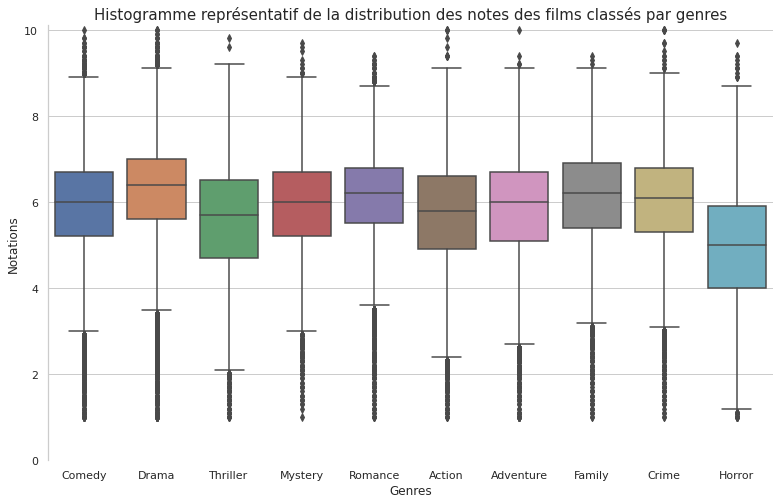

In [70]:
movies_viz.genres_boxplot(df_genres_split, list_genres)

## Etudes statistiques

Quelques statistiques descriptives pour mieux connaître la base :

In [35]:
df.describe().round(2)

,year,runtime,rate,votes
count,188255.00,188255.00,188255.00,188255.00
mean,1989.80,95.87,5.95,4411.68
std,26.14,23.53,1.25,36790.81
min,1894.00,1.00,1.00,5.00
25%,1972.00,84.00,5.20,21.00
50%,1998.00,93.00,6.10,82.00
75%,2012.00,104.00,6.80,426.00
max,2021.00,808.00,10.00,2298815.00


Commentaires : la moyenne de l'année de sortie est plus faible que la médiane ; il existe en effet de nombreux films sortis dans la première moitié du XXème siècle qui tirent la moyenne vers le bas. Pour le runtime, on peut s'étonner que certains films (7 après vérification) ne font qu'une minute !

50 % des films de notre base font moins de 93 minutes, ce qui paraît relativement faible lorsqu'on regarde la durée des films disponibles en salle au cours des dernières années. Certaines productions peu connues sont sans doute plus courtes, faute de budget (notamment des films étrangers hors Hollywood). 

### Distribution des durées de films

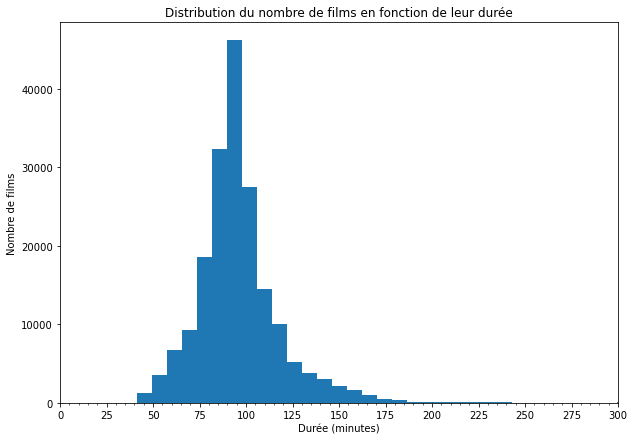

In [8]:
movies_viz.runtime_hist(df)

### Note moyenne en fonction de l'année

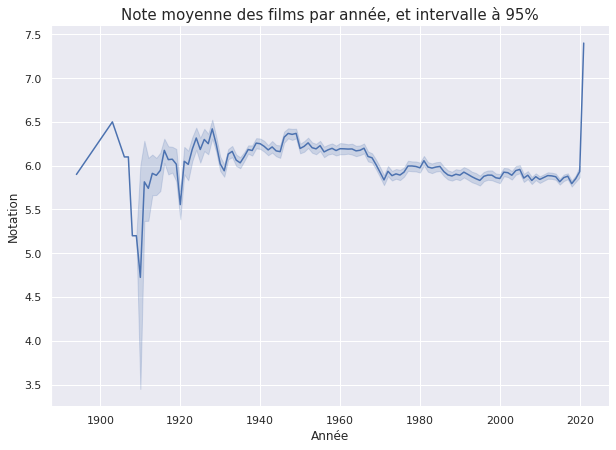

In [10]:
movies_viz.rank_year(df)

Commentaires : Avant 1920, l'écart type est trop important pour conclure quoi que ce soit car nous n'avons pas assez de films. Cependant, il semblerait que depuis 1950 la note du film diminue légèrement. Si l'on peut penser que les anciens films sont meilleurs, on peut aussi l'expliquer par le fait que le cinéphile moyen ne va regarder que les meilleurs films anciens, alors qu'il va avoir tendance à visionner tous les films qui sortent aujourd'hui et à les noter systématiquement sur IMDb.

Seul un film sortant en 2021 a été retenu par le cleaning : 

In [112]:
df[df["year"]==2021]

,tconst,title,year,runtime,genres,rate,votes,director,casting
21675,tt2133204,Construction,2021,104,"Comedy, Romance",7.4,32,Malcolm Goodwin,"['Victor Hawks', 'Gino Anthony Pesi', 'Devin R..."


### Corrélations

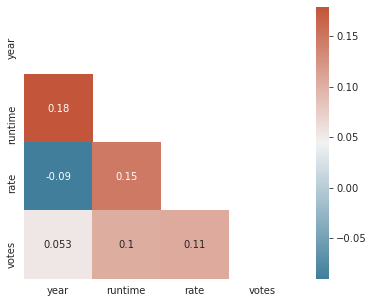

In [5]:
movies_viz.corr_matrix(df)

Commentaires : comme vu précédemment, l'année influe négativement sur la note. Autre résultat attendu, l'augmentation de l positivement sur la durée moyenne des films au fil du temps. De plus, les films plus long sont globalement mieux notés.

Corrélation positive du rate et des votes ??????

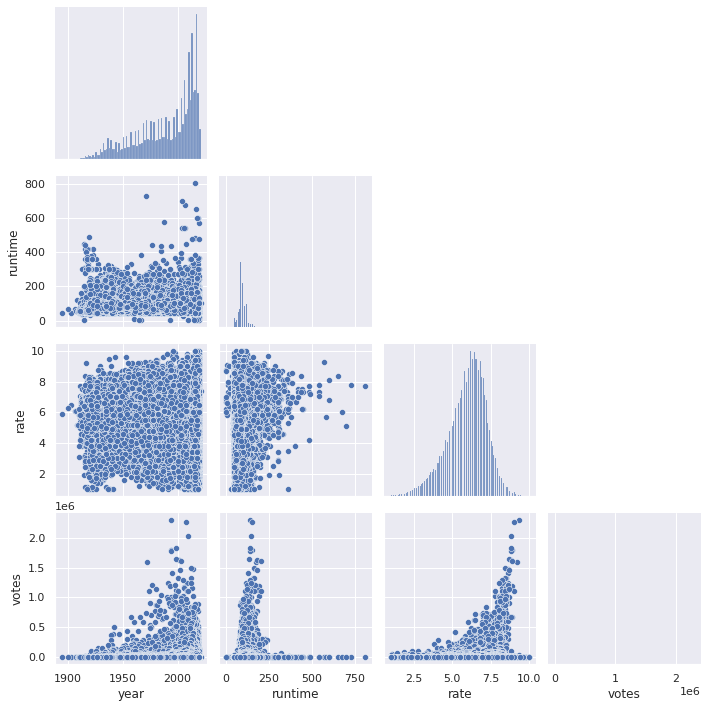

In [16]:
movies_viz.pairplot(df) # 5 min de chargement